In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
# df = pd.read_csv("spam_ham_dataset.csv",usecols=["label","text"])
df = pd.read_csv("spam_ham_dataset.csv")
df

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [3]:
df["label_num"].value_counts()

0    3672
1    1499
Name: label_num, dtype: int64

In [4]:
df["label"].value_counts()

ham     3672
spam    1499
Name: label, dtype: int64

In [5]:
data_frame = df.drop(["Unnamed: 0","label_num"],axis=1)

In [6]:
data_frame

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...
...,...,...
5166,ham,Subject: put the 10 on the ft\r\nthe transport...
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
5168,ham,Subject: calpine daily gas nomination\r\n>\r\n...
5169,ham,Subject: industrial worksheets for august 2000...


In [7]:
data_frame.shape

(5171, 2)

In [8]:
data_frame.isnull().sum()

label    0
text     0
dtype: int64

In [9]:
data_frame.drop_duplicates(inplace=True)

In [10]:
data_frame.shape

(4993, 2)

c:\users\alami\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

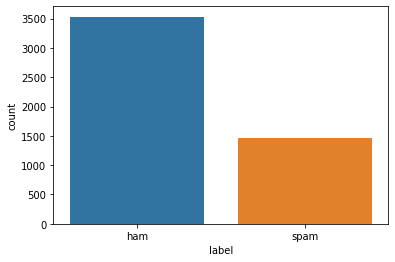

In [11]:
sb.countplot(data_frame["label"])

# data preprocessing

In [12]:
dumies = pd.get_dummies(data_frame["label"])

In [13]:
dumies

,ham,spam
0,1,0
1,1,0
2,1,0
3,0,1
4,1,0
...,...,...
5165,1,0
5166,1,0
5167,1,0
5169,1,0


In [14]:
data_frame.head()

,label,text
0,ham,Subject: enron methanol ; meter # : 988291\r\n...
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see..."
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar..."
3,spam,"Subject: photoshop , windows , office . cheap ..."
4,ham,Subject: re : indian springs\r\nthis deal is t...


In [15]:
data_frame2 = pd.concat([data_frame,dumies],axis="columns")

In [16]:
data_frame2

,label,text,ham,spam
0,ham,Subject: enron methanol ; meter # : 988291\r\n...,1,0
1,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",1,0
2,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",1,0
3,spam,"Subject: photoshop , windows , office . cheap ...",0,1
4,ham,Subject: re : indian springs\r\nthis deal is t...,1,0
...,...,...,...,...
5165,ham,"Subject: fw : crosstex energy , driscoll ranch...",1,0
5166,ham,Subject: put the 10 on the ft\r\nthe transport...,1,0
5167,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,1,0
5169,ham,Subject: industrial worksheets for august 2000...,1,0


In [17]:
data_frame2 = data_frame2.drop(["label","ham"],axis=1)

In [18]:
data_frame2

,text,spam
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...
5165,"Subject: fw : crosstex energy , driscoll ranch...",0
5166,Subject: put the 10 on the ft\r\nthe transport...,0
5167,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5169,Subject: industrial worksheets for august 2000...,0


In [19]:
featurs = data_frame2.text.values
level = data_frame2.spam.values

In [20]:
featurs

array(["Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .",
       'Subject: hpl nom for january 9 , 2001\r\n( see attached file : hplnol 09 . xls )\r\n- hplnol 09 . xls',
       "Subject: neon retreat\r\nho ho ho , we ' re around to that most wonderful time of the year - - - neon leaders retreat time !\r\ni know that this time of year is extremely hectic , and that it ' s tough to think about anything past the holidays , but life does go on past the week of december 25 through january 1 , and that ' s what i ' d like you to think about for a minute .\r\non the calender that i handed out at the beginning of the fall semester , the retreat was scheduled for the weekend of january 5 - 6 . but because of a

In [21]:
level

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(featurs,level,test_size=0.2,random_state=43)

In [24]:
tf_idf = TfidfVectorizer()

In [25]:
xtrain = tf_idf.fit_transform(xtrain).toarray()

In [26]:
xtrain

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.02153944, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
model = MultinomialNB()

In [28]:
model.fit(xtrain,ytrain)

MultinomialNB()

In [29]:
xtest = tf_idf.transform(xtest).toarray()

In [34]:
pred_value = model.predict(xtest)

In [31]:
accuracy = model.score(xtest,ytest)
print("Accuracy: ",round(accuracy*100,ndigits=3),"%")

Accuracy:  89.089 %


In [37]:
# Performance calculate
Accuracy_score = accuracy_score(ytest,pred_value)
print("Accuracy score: ",round(Accuracy_score*100,ndigits=3),"%")

Accuracy score:  89.089 %


In [39]:
Confusion_matrix = confusion_matrix(ytest,pred_value)
print(Confusion_matrix)

[[732   1]
 [108 158]]
